In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = pd.read_csv('colors.csv')
inventory_parts = pd.read_csv('inventory_parts.csv')
inventories = pd.read_csv('inventories.csv')
colors_inventory_sets = colors.merge(inventory_parts,left_on='id',right_on='color_id').\
merge(inventories,left_on='inventory_id',right_on='id').merge(sets,on='set_num')
themes = pd.read_csv('themes.csv')
                                                                                        


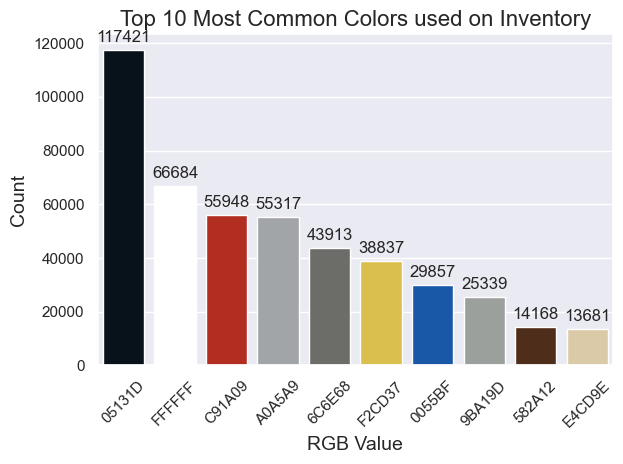

In [77]:
#1. Top 10 most frequent used colors on Lego sets
top_10_colors = colors_inventory_sets['rgb'].value_counts().reset_index().head(10)
top_10_colors.columns = ['rgb', 'count']

color_palette = ['#' + color for color in top_10_colors['rgb']]
sns.set(style="darkgrid")

barplot = sns.barplot(x='rgb', y='count', data=top_10_colors, palette=color_palette)
plt.title('Top 10 Most Common Colors used on Inventory', fontsize=16)
plt.xlabel('RGB Value', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Annotation
for p in barplot.patches:
    height = int(p.get_height()) 
    barplot.annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2, height), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

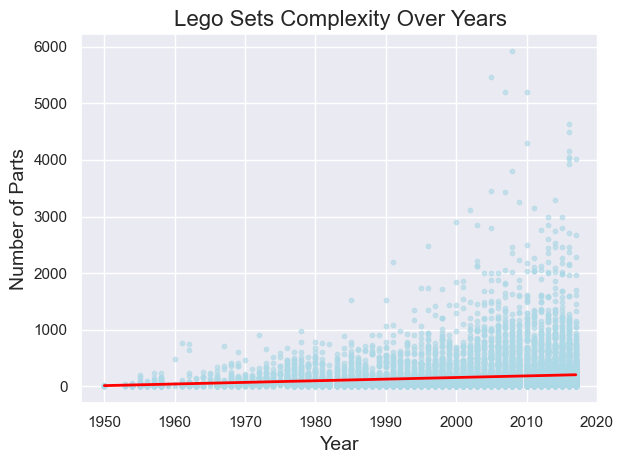

In [85]:
#2.1 The number of parts Lego used over the years is generally increasing
# Looks like Lego sets are getting more sophisticated over the years
sets = pd.read_csv('sets.csv')

sns.regplot(x='year', y='num_parts', data=sets, 
            scatter_kws={'color': 'lightblue', 'alpha': 0.6, 's': 10}, 
            line_kws={'color': 'red', 'lw': 2})

# Adding a title and labels
plt.title('Lego Sets Complexity Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Parts', fontsize=14)
plt.tight_layout()
plt.show()

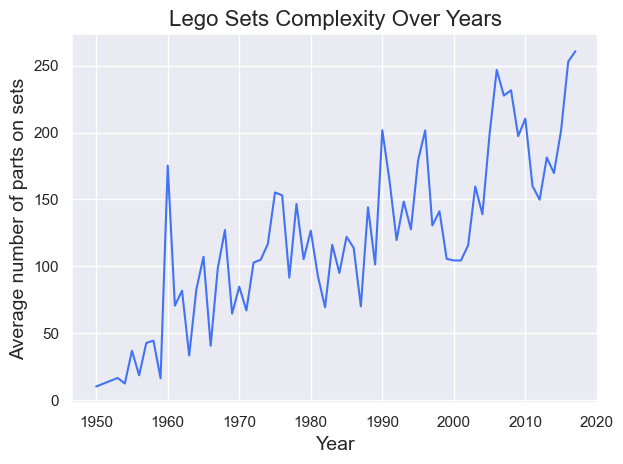

In [88]:
#2.2 Line plot with average number of parts for better visulization
sns.lineplot(x='year',y='num_parts',data=sets,errorbar=None,color='#4272f5')

# Adding a title and labels
plt.title('Lego Sets Complexity Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average number of parts on sets', fontsize=14)
plt.tight_layout()
plt.show()

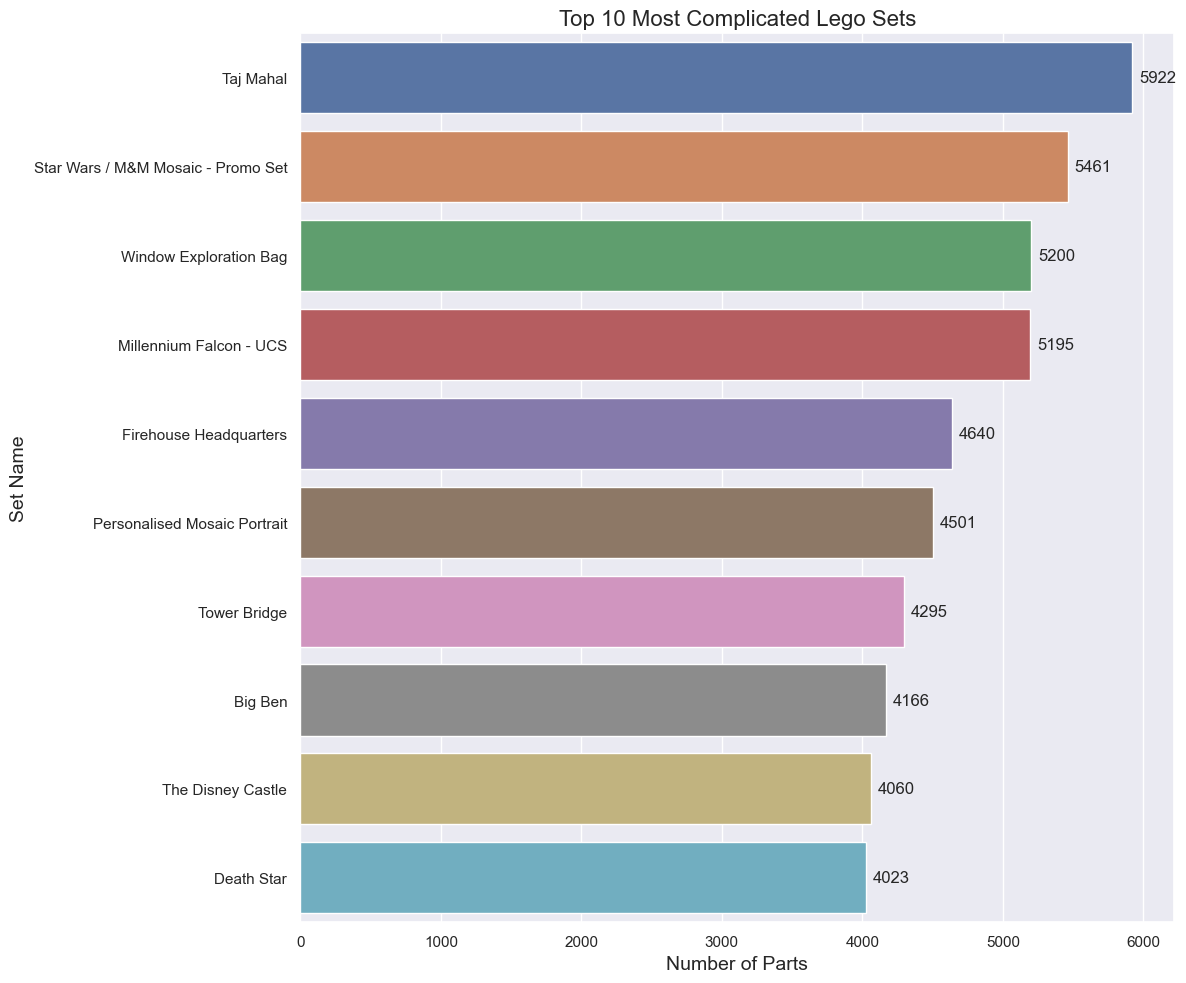

In [172]:
#3. Most complicated lego sets(with high number of parts) 
top_sets = sets[['name', 'num_parts', 'year']].sort_values('num_parts', ascending=False).head(10)

# Create a bar plot without the hue
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='num_parts', y='name', data=top_sets)

# Adding a title and labels
plt.title('Top 10 Most Complicated Lego Sets', fontsize=16)
plt.xlabel('Number of Parts', fontsize=14)
plt.ylabel('Set Name', fontsize=14)

# Annotate each bar
for p in ax.patches:
    width = p.get_width()  # Get the width of the bar
    ax.annotate(f'{int(width)}', 
                (p.get_x() + width, p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), 
                textcoords='offset points', 
                ha='left', va='center')

plt.tight_layout()
plt.show()

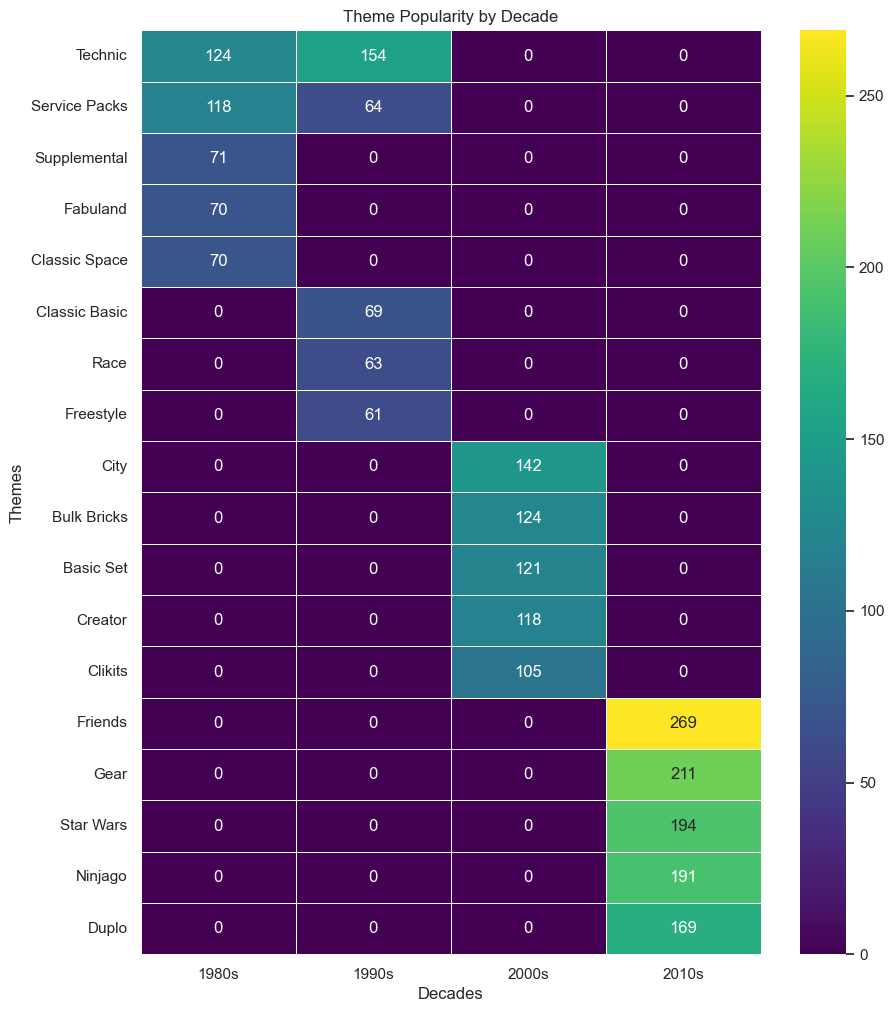

In [118]:
#4. Comparison of popular themes on lego sets in each decades
# We can see that the popular themes on each decade change very quickly
# the top 5 most popular themes from 1990s ~ 2010s can be totally different
themes_sets = themes.merge(sets,left_on='id',right_on='theme_id')

def theme_counts_for_decade(data, start_year, end_year):
    decade_data = data[(data['year'] >= start_year) & (data['year'] <= end_year)]
    return decade_data['name_x'].value_counts().head(5)

# Spliting decades
counts_80s = theme_counts_for_decade(themes_sets, 1980, 1989)
counts_90s = theme_counts_for_decade(themes_sets, 1990, 1999)
counts_2000s = theme_counts_for_decade(themes_sets, 2000, 2009)
counts_2010s = theme_counts_for_decade(themes_sets, 2010, 2019)

df_80s = counts_80s.reset_index().rename(columns={'index': 'Theme', 'name_x': '1980s'})
df_90s = counts_90s.reset_index().rename(columns={'index': 'Theme', 'name_x': '1990s'})
df_2000s = counts_2000s.reset_index().rename(columns={'index': 'Theme', 'name_x': '2000s'})
df_2010s = counts_2010s.reset_index().rename(columns={'index': 'Theme', 'name_x': '2010s'})

# Merge the DataFrames
decade_counts = pd.merge(pd.merge(pd.merge(df_80s, df_90s, on='Theme', how='outer'), df_2000s, on='Theme', how='outer'), df_2010s, on='Theme', how='outer').fillna(0)

# Set the Theme as index
decade_counts.set_index('Theme', inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(decade_counts, annot=True, cmap='viridis', linewidths=.5, fmt='g') 
plt.title('Theme Popularity by Decade')
plt.ylabel('Themes')
plt.xlabel('Decades')
plt.show()

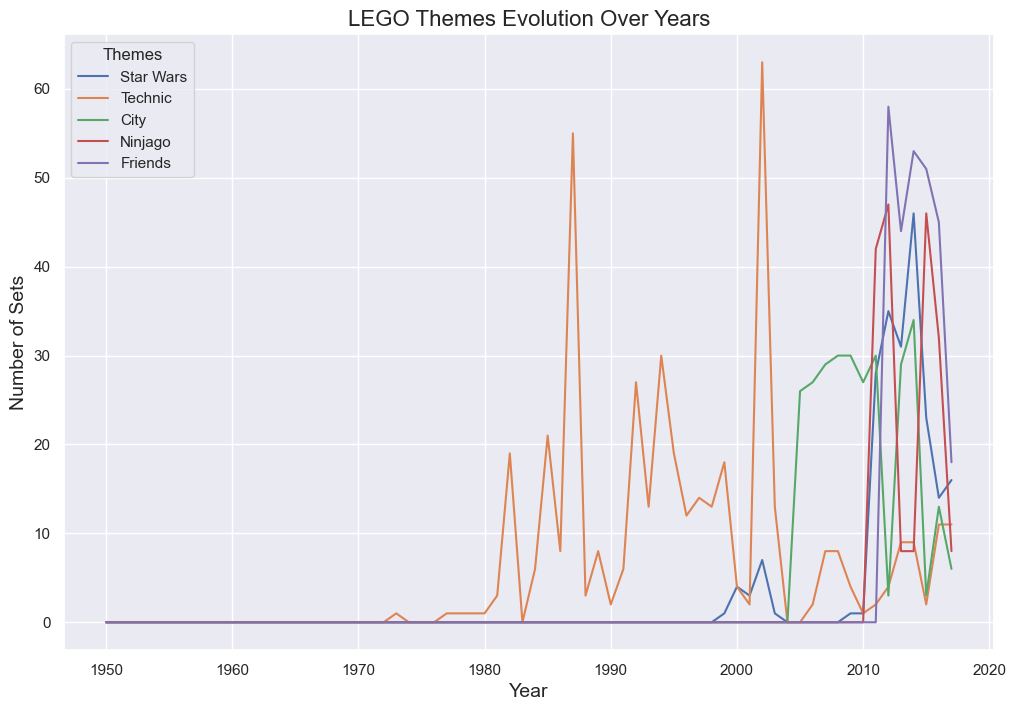

In [200]:
#5. number of sets released in that theme has changed over the years
themes_sets = themes.merge(sets,left_on='id',right_on='theme_id')
yearly_theme_counts = themes_sets.groupby(['year', 'name_x']).size().reset_index(name='set_count')

# Pivot the data to have years as the index and themes as columns
pivot_yearly_theme_counts = yearly_theme_counts.pivot(index='year', columns='name_x', values='set_count').fillna(0)

# Select a few popular themes(based on #4) to plot:
selected_themes = ['Star Wars', 'Technic', 'City', 'Ninjago','Friends'] 


plt.figure(figsize=(12, 8))
for theme in selected_themes:
    if theme in pivot_yearly_theme_counts.columns:
        plt.plot(pivot_yearly_theme_counts.index, pivot_yearly_theme_counts[theme], label=theme)

plt.title('LEGO Themes Evolution Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Sets', fontsize=14)
plt.legend(title='Themes')
plt.grid(True)
plt.show()